## Labwork 3 | Raster rendering of lines.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Исходные точки отрезка
x0, y0 = 2, 2
x1, y1 = 39, 10


def plot_line(points, grid_width=40, grid_height=15, figsize=(10, 6)):
    """
    Plots a list of (x, y) pixel coordinates on a fixed 20×30 grid.
    """
    if not points:
        return

    xs, ys = zip(*points)

    plt.figure(figsize=figsize)
    plt.scatter(xs, ys, c='green', s=100, marker='s')

    plt.xlim(-1, grid_width)
    plt.ylim(-1, grid_height)

    plt.xticks(range(0, grid_width + 1))
    plt.yticks(range(0, grid_height + 1))
    plt.grid(True, which='both', linestyle=':', color='gray')

    plt.gca().set_aspect('equal')

    plt.show()

def plot(*shapes,
            size=6,
            lim=15,
            major=5,
            with_points=True,
            point_size=5,
            close=True,
            **common_plot_kw):
    fig, ax = plt.subplots(figsize=(size, size))

    for item in shapes:
        if isinstance(item, tuple):
            shape, plot_kw = item
        else:
            shape, plot_kw = item, {}

        shape = np.asarray(shape)
        x = shape[:, 0] / shape[:, 2]
        y = shape[:, 1] / shape[:, 2]

        if close:
            xx = np.append(x, x[0])
            yy = np.append(y, y[0])
        else:
            xx, yy = x, y

        ax.plot(xx, yy, **({"linewidth": 1.6} | common_plot_kw | plot_kw))

        if with_points:
            ax.scatter(x, y, s=point_size, zorder=3)

    ax.set_aspect("equal")
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)

    major_ticks = np.arange(-lim, lim + 1, major)
    minor_ticks = np.arange(-lim, lim + 1, 1)
    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    ax.set_yticks(major_ticks)
    ax.set_yticks(minor_ticks, minor=True)
    ax.grid(which="major", linestyle="-", linewidth=0.8)
    ax.grid(which="minor", linestyle=":", linewidth=0.5)

    plt.show()



In [2]:
def naive_line(x0, y0, x1, y1):
    points = []
    dx = x1 - x0
    dy = y1 - y0

    step = round(max(abs(dx), abs(dy)))
    if step != 0:
        dx /= step
        dy /= step
        for i in range(step):
            points.append((round(x0 + i * dx), round(y0 + i * dy)))

    return points



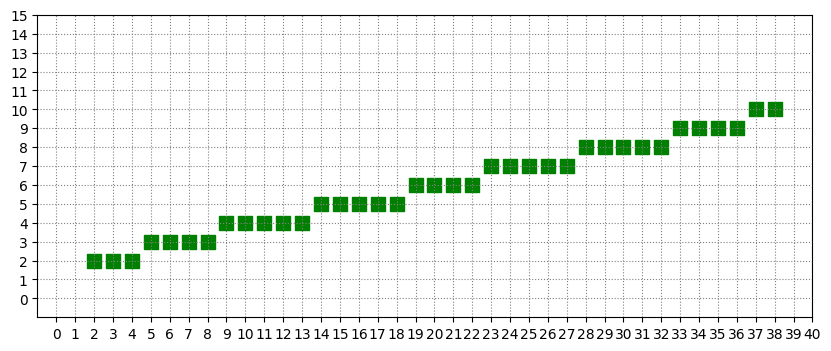

In [5]:
naive = naive_line(x0, y0, x1, y1)
plot_line(naive)

https://www.youtube.com/watch?v=CceepU1vIKo

In [6]:
def bresenham_horizontal(x0, y0, x1, y1):
    points = []

    if x0 > x1:
        x0, x1 = x1, x0
        y0, y1 = y1, y0

    dx = x1 - x0
    dy = y1 - y0
    y_step = 1 if dy >= 0 else -1
    dy = abs(dy)

    y = y0
    p = 2 * dy - dx
    for x in range(x0, x1 + 1):
        points.append((x, y))
        if p >= 0:
            y += y_step
            p -= 2 * dx
        p += 2 * dy

    return points


def bresenham_vertical(x0, y0, x1, y1):
    points = []

    if y0 > y1:
        x0, x1 = x1, x0
        y0, y1 = y1, y0

    dx = x1 - x0
    dy = y1 - y0
    x_step = 1 if dx >= 0 else -1
    dx = abs(dx)

    x = x0
    p = 2 * dx - dy
    for y in range(y0, y1 + 1):
        points.append((x, y))
        if p >= 0:
            x += x_step
            p -= 2 * dy
        p += 2 * dx

    return points


def bresenham(x0, y0, x1, y1):
    if abs(x1 - x0) >= abs(y1 - y0):
        return bresenham_horizontal(x0, y0, x1, y1)
    else:
        return bresenham_vertical(x0, y0, x1, y1)


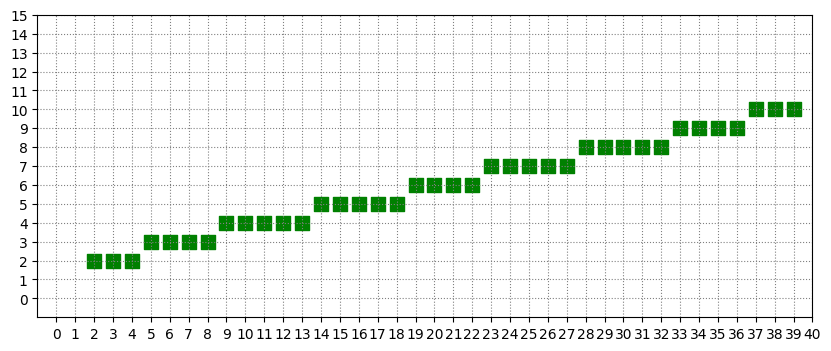

In [113]:

bres = bresenham(x0, y0, x1, y1)
plot_line(bres)

### Task 2 | Bezier Curves

Постройте кривую Безье второго порядка. Подвергните её композиции аффинных
преобразований $T_{\vec{a}} \circ Sh^{2}_{x} \circ R^{\pi/4}_O$ и масштабируйте, задав эти преобразования матрицей однородных координат опорных точек.

$$
B(t) = \sum^{n}_{t=0} \binom{n}{t}(1-t)^{n-i}t^iP_i; \\ t ∈ [0, 1]
$$

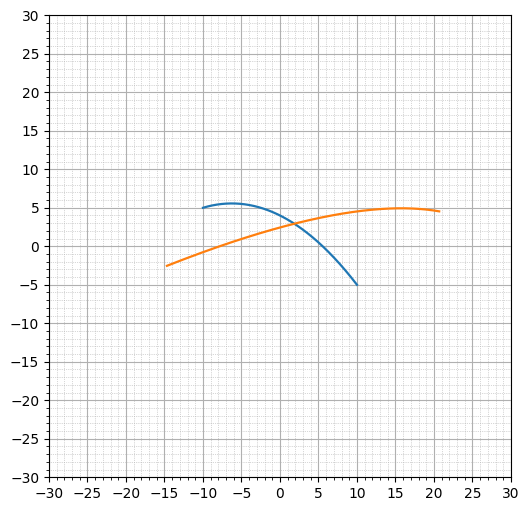

In [ ]:
from scipy.special import comb

P0 = np.array([-10, 5, 1])
P1 = np.array([0, 8, 1])
P2 = np.array([10, -5, 1])

t = np.linspace(0, 1, 500).reshape(-1, 1)

def bezier(points, t):
    n = len(points) - 1
    curve = np.zeros((len(t), control_points.shape[1]))

    for i in range(n + 1):
        b = comb(n, i) * ((1 - t)**(n - i)) * (t**i)
        curve += b * control_points[i]

    return curve

control_points = np.stack([P0, P1, P2])
curve = bezier(control_points, t)

# Матрицы преобразования
theta = np.pi / 4
T = np.array([[1, 0, 3],
              [0, 1, 1],
              [0, 0, 1]])

Shx = np.array([[1, 2, 0], [0, 1, 0], [0, 0, 1]])

R = np.array([[np.cos(theta), -np.sin(theta), 0],
              [np.sin(theta),  np.cos(theta), 0],
              [0, 0, 1]])
A = T @ Shx @ R

# Преобразуем опорные точки
P0_t = A @ P0
P1_t = A @ P1
P2_t = A @ P2

control_points = np.stack([P0_t, P1_t, P2_t])
curve_t = bezier(control_points, t)

P = np.vstack([P0, P1, P2])
P_transformed = np.vstack([P0_t, P1_t, P2_t])

plot(curve, curve_t, close=False, with_points=False, lim=30)

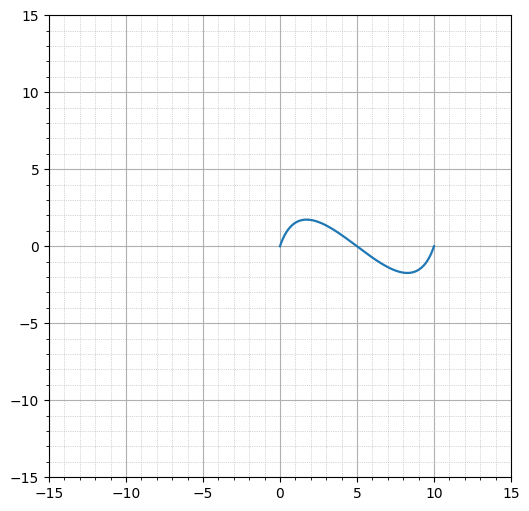

In [ ]:
P0 = np.array([0, 0, 1])
P1 = np.array([2, 6, 1])
P2 = np.array([8, -6, 1])
P3 = np.array([10, 0, 1])

control_points = np.stack([P0, P1, P2, P3])
curve = bezier(control_points, t)
plot(curve, close=False, with_points=False)

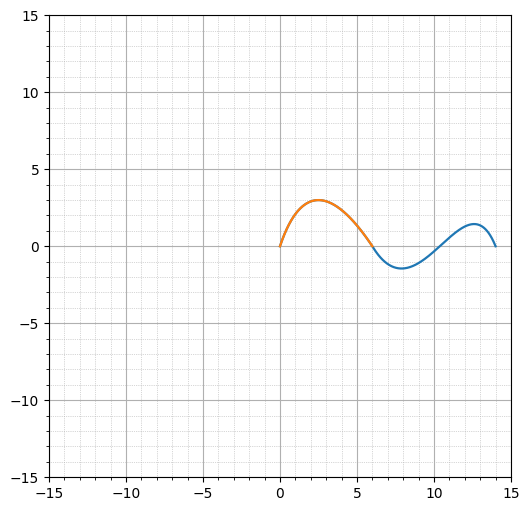

In [156]:
# Quadratic segment
P0 = np.array([0, 0, 1])
P1 = np.array([2, 6, 1])
P2 = np.array([6, 0, 1])

# Cubic segment (starts where quadratic ends)
P3 = P2
P4 = np.array([9, -5, 1])
P5 = np.array([12, 5, 1])
P6 = np.array([14, 0, 1])

control_points = np.stack([P0, P1, P2])
curve1 = bezier(control_points, t)

control_points = np.stack([P3, P4, P5, P6])
curve2 = bezier(control_points, t)

spline = np.vstack([curve1, curve2])

plot(spline, (curve1, {"color": "tab:orange"}), with_points=False, close=False)

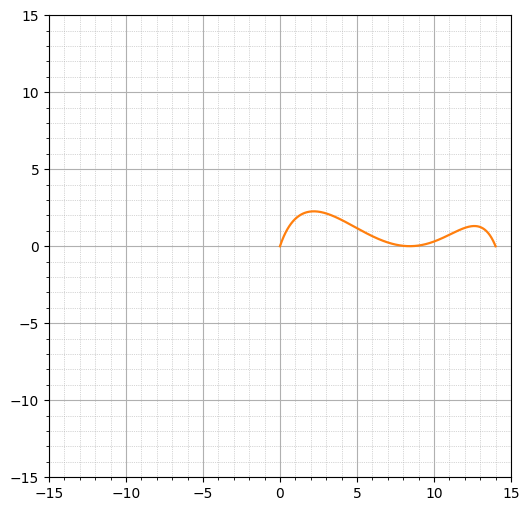

In [158]:
control_points = np.stack([P0, P1, P2, P4, P5, P6])
curve = bezier(control_points, t)

plot((curve, {"color": "tab:orange"}), with_points=False, close=False)